# **Logistic Regression**
>`Logistic regression` is a `classification` algorithm used to assign observations to a discrete set of classes. 
Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the `logistic sigmoid function` to return a `probability value` which can then be mapped to two or more discrete classes.

Logistic regression is used for binary classification, where the goal is to predict one of two possible outcomes, typically represented as 0 and 1. The sigmoid function is at the core of logistic regression, serving as the link function that maps the linear combination of input features to a probability.

**The formula for logistic regression is:**

```
y = 1 / (1 + e^-(b0 + b1*x))
```

Where:

- `y` is the predicted output,
- `b0` is the bias or intercept term,
- `b1` is the coefficient for the single input value `x`,
- `e` is the base of natural logarithms (approximately equal to 2.71828).

This formula is used to model a binary dependent variable, that is, a variable that can take on only two possible outcomes, typically 0 and 1. The right side of the equation is the logistic function, which is used to transform linear regression output to a probability that the target variable belongs to a particular class.

**Use Cases:**
- Credit risk score prediction
- Customer churn prediction

| Advantages | Disadvantages |
|------------|---------------|
| Interpretable and explainable | Assumes linearity between inputs and output |
| Less prone to overfitting when using regularization | Can overfit with small, high dimensional data |
| Applicable for multi-class predictions | |

**Logistic regression can be used for:**
1. `Binary Classification:` (true / false, male / female, 0 / 1, survived / not-survived)
2. `Multi-class Classification:` which is not binary (more than two options) 
3. `Multilabel classification:` giving multiple labels 
   - Animal Movie labels: Hindi, Bollywood, Box Office, Thriller, Action, 
4. One-vs-Rest Classification: 

**Important Metrics for Logistic Regression:**
- Output (prediction) comes with probability 
- Sigmoil: logistic regression function

- `accuracy_score`: This is the simplest way to evaluate a classification model. It's the ratio of correct predictions to total predictions. However, it can be misleading if the classes are imbalanced.
- `recall_score`: Also known as sensitivity or true positive rate. It's the ratio of true positives to the sum of true positives and false negatives. It's used when the cost of false negatives is high.
- `precision_score`: It's the ratio of true positives to the sum of true positives and false positives. It's used when the cost of false positives is high.
- `f1_score`: This is the harmonic mean of precision and recall. It tries to balance the two and is a good measure when the classes are imbalanced.
- `confusion_matrix`: This is a table that describes the performance of a classification model. It shows true positives, true negatives, false positives, and false negatives.
- `classification_report`: This function builds a text report showing the main classification metrics, including precision, recall, f1-score, and support (the number of instances for each class in y_true).

These metrics provide different perspectives on the performance of the model, and can help you understand where the model is doing well and where it's making errors.

| Metric | Regression | Classification | Description |
|--------|------------|----------------|-------------|
| MSE (Mean Square Error) | Yes | No | The average of the squares of the differences between the actual and predicted values. A lower value is better. |
| R^2 | Yes | No | The proportion of the variance in the dependent variable that is predictable from the independent variables. A higher value (close to 1) is better. |
| RMSE (Root Mean Square Error) | Yes | No | The square root of the MSE. It measures the standard deviation of the residuals. A lower value is better. |
| MAE (Mean Absolute Error) | Yes | No | The average of the absolute differences between the actual and predicted values. A lower value is better. |
| Accuracy Score | No | Yes | The proportion of correct predictions out of all predictions. A higher value (close to 1) is better. |
| Recall Score | No | Yes | The proportion of actual positive cases that were correctly identified. A higher value (close to 1) is better. |
| Precision Score | No | Yes | The proportion of predicted positive cases that were correct. A higher value (close to 1) is better. |
| F1 Score | No | Yes | The harmonic mean of precision and recall. It's a good metric to use if you want to balance precision and recall. A higher value (close to 1) is better. |
| Confusion Matrix | No | Yes | A table that shows the number of true positives, true negatives, false positives, and false negatives. It provides a comprehensive view of the model's performance. |

#### **Assumptions of Logistic regression:**
1. The dependent variable must be categorical in nature.
2. The independent variables(features) must be independent.
3. There should be no outliers in the data. Check for outliers.
4. There should be no high correlations among the independent variables. This can be checked using a correlation matrix.


#### **1. Import Libraries:**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

#### **2. Import Dataset:**

In [2]:
# Import dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### **3. Data Preprocessing:**

In [8]:
# pre prcoess the data
# remove the deck column
df.drop('deck', axis=1, inplace=True) # drop the deck column as it has too many missing values

# impute missing values in age and fare
df['age'].fillna(df['age'].median(), inplace=True) # impute missing values in age with median
df['fare'].fillna(df['fare'].median(), inplace=True) # impute missing values in fare with median

# impute missing values in embark and embarked town
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True) # impute missing values in embark_town with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True) # impute missing values in embarked with mode
 
# encode the categorical variables using for loop where object and categoy datatypes are given 
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])

df.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_1440\2217011011.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_1440\2217011011.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


This code is performing several preprocessing steps on a pandas DataFrame `df`:

1. **Removing the 'deck' column**: The `drop` function is used to remove the 'deck' column from the DataFrame. The argument `axis=1` specifies that a column (not a row) should be removed. The argument `inplace=True` means that the change should be made directly in the original DataFrame, rather than creating a new one.

2. **Imputing missing values in 'age' and 'fare'**: The `fillna` function is used to fill in missing values (NaNs) in the 'age' and 'fare' columns. The `median` function is used to calculate the median of the existing values in these columns, and this median value is used to replace the missing values. Again, `inplace=True` means that the changes are made directly in the original DataFrame.

3. **Imputing missing values in 'embark_town' and 'embarked'**: Similar to the previous step, but this time the `mode` function is used to calculate the most common value (mode) in the 'embark_town' and 'embarked' columns, and this value is used to replace the missing values.

4. **Encoding categorical variables**: The `for` loop goes through each column in the DataFrame. If the data type of the column is 'object' or 'category' (which are typically used for categorical variables), the `LabelEncoder` from sklearn is used to convert the categorical values into numerical values. This is necessary because many machine learning algorithms (including logistic regression) require numerical input.

5. Finally, the `head` function is used to print out the first few rows of the DataFrame, so you can check that the preprocessing steps have been carried out correctly.

**Observations from the Output:**

- `survived`: This is likely the target variable for your logistic regression model. It's a binary variable where 1 indicates the passenger survived and 0 indicates they did not.

- `pclass`: This is the passenger class, a proxy for socio-economic status (1 = 1st class, 2 = 2nd class, 3 = 3rd class).

- `sex`: This has been encoded as a binary variable, likely where 1 represents male and 0 represents female.

- `age`: This is the age of the passenger. Missing values have been filled with the median age.

- `sibsp`: This is the number of siblings/spouses aboard the Titanic.

- `parch`: This is the number of parents/children aboard the Titanic.

- `fare`: This is the passenger fare. Missing values have been filled with the median fare.

- `embarked`: This is the port of embarkation and it has been encoded into numerical values.

- `class`, `who`, `adult_male`, `embark_town`, `alive`, `alone`: These are additional categorical variables that have been encoded into numerical values.

From this output, it's clear that the preprocessing steps have been applied correctly: missing values have been imputed, categorical variables have been encoded, and the 'deck' column has been dropped. The data is now ready to be used in a logistic regression model.

#### **4. Separate the feature (X) and target (y):**

In [9]:
# Separate the feature (X) and target (y)
X = df.drop('survived', axis=1) 
y = df['survived']

This code is separating the features and target variable for a machine learning model:

- `X = df.drop('survived', axis=1)`: This line is creating a new DataFrame `X` that includes all columns from the original DataFrame `df` except for 'survived'. This is done by using the `drop` function with `axis=1` (which refers to columns). `X` will be used as the input features for the model.

- `y = df['survived']`: This line is creating a new Series `y` that includes only the 'survived' column from `df`. `y` will be used as the target variable for the model.

In the context of logistic regression, `X` would be the independent variables and `y` would be the dependent variable (the one you're trying to predict). In this case, you're trying to predict whether or not a passenger survived ('survived') based on various features about them (`X`).

#### **5. Train-Test Split the Data:**

In [13]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### **6. Build the Model:**

#### **6.1. Call / Create the Model:**

In [15]:
# model call
model = LogisticRegression()

#### **6.2. Train the Model:**

In [16]:
# train the model
model.fit(X_train, y_train)

c:\Users\Hp\miniconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### **7. Prediction:**

In [17]:
# predict the values
y_pred = model.predict(X_test)

#### **8. Evaluate the Model:**

In [18]:
# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  1.0
Recall Score:  1.0
Precision Score:  1.0
F1 Score:  1.0
Confusion Matrix: 
 [[117   0]
 [  0  62]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00        62

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



The output shows that the model has achieved **perfect performance** on the test data:

- The `Accuracy Score` of 1.0 means that 100% of the model's predictions were correct.

- The `Recall Score` of 1.0 means that the model correctly identified all actual positive cases (in this case, all passengers who actually survived).

- The `Precision Score` of 1.0 means that all of the model's positive predictions were correct (i.e., all passengers that the model predicted to survive, actually did survive).

- The `F1 Score` of 1.0, which is the harmonic mean of precision and recall, also indicates perfect performance.

- The `Confusion Matrix` shows that there were no false positives or false negatives. The model correctly predicted all 117 negative cases (passengers who did not survive) and all 62 positive cases (passengers who did survive).

- The `Classification Report` also shows perfect precision, recall, and F1-score for both classes, as well as perfect overall accuracy.

> While this might seem like a great result, it's also a bit suspicious. It's very rare to get a perfect score on a real-world dataset. This could potentially indicate overfitting, where the model has learned the training data too well and may not perform as well on new, unseen data. It's recommended to further investigate this result, possibly by checking the model's performance with cross-validation or on a separate validation dataset.

#### **8.1 Plot the Confusion Matrix:**

Text(95.72222222222221, 0.5, 'Actual')

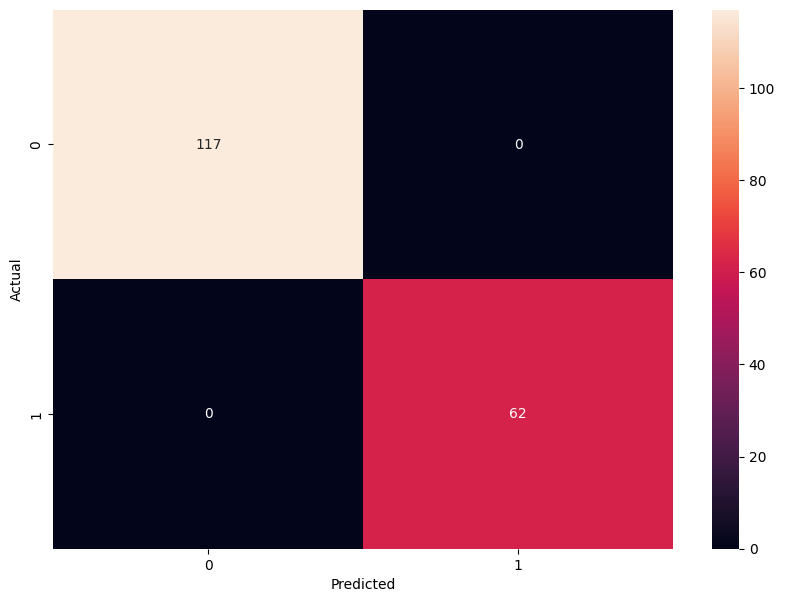

In [19]:
# plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

#### **9. Save the Model:**

In [13]:
# save the model
import pickle
pickle.dump(model, open('./saved_models/02_model_logistic_regression.pkl', 'wb'))